<a href="https://colab.research.google.com/github/Rits396/Technique-to-Mitigating-Bias/blob/main/Techniques_To_Mitigate_Bias_In_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
print("=" * 60)
print("STEP 1: Creating Imbalanced Synthetic Dataset")
print("=" * 60)

STEP 1: Creating Imbalanced Synthetic Dataset


In [4]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # 90% class 0, 10% class 1
    flip_y=0,
    random_state=42
)
print(f"\nOriginal Dataset Distribution:")
print(f"Class 0: {sum(y == 0)} samples ({sum(y == 0)/len(y)*100:.1f}%)")
print(f"Class 1: {sum(y == 1)} samples ({sum(y == 1)/len(y)*100:.1f}%)")



Original Dataset Distribution:
Class 0: 900 samples (90.0%)
Class 1: 100 samples (10.0%)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTraining Set Distribution:")
print(f"Class 0: {sum(y_train == 0)} samples")
print(f"Class 1: {sum(y_train == 1)} samples")



Training Set Distribution:
Class 0: 630 samples
Class 1: 70 samples


In [7]:
print("\n" + "=" * 60)
print("STEP 2: Training Model on Imbalanced Data")
print("=" * 60)

# Train Random Forest on imbalanced data
rf_imbalanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_imbalanced.fit(X_train, y_train)


STEP 2: Training Model on Imbalanced Data


RandomForestClassifier(random_state=42)

In [8]:
y_pred_imbalanced = rf_imbalanced.predict(X_test)


In [9]:
acc_imbalanced = accuracy_score(y_test, y_pred_imbalanced)
prec_imbalanced = precision_score(y_test, y_pred_imbalanced)
rec_imbalanced = recall_score(y_test, y_pred_imbalanced)
f1_imbalanced = f1_score(y_test, y_pred_imbalanced)

print(f"\nPerformance on Imbalanced Data:")
print(f"Accuracy:  {acc_imbalanced:.4f}")
print(f"Precision: {prec_imbalanced:.4f}")
print(f"Recall:    {rec_imbalanced:.4f}")
print(f"F1 Score:  {f1_imbalanced:.4f}")



Performance on Imbalanced Data:
Accuracy:  0.9933
Precision: 1.0000
Recall:    0.9333
F1 Score:  0.9655


In [10]:
print("\n" + "=" * 60)
print("STEP 3: Applying SMOTE (Oversampling Minority Class)")
print("=" * 60)


STEP 3: Applying SMOTE (Oversampling Minority Class)


In [11]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE - Training Set Distribution:")
print(f"Class 0: {sum(y_train_smote == 0)} samples")
print(f"Class 1: {sum(y_train_smote == 1)} samples")



After SMOTE - Training Set Distribution:
Class 0: 630 samples
Class 1: 630 samples



Performance after SMOTE:
Accuracy:  0.9600
Precision: 0.7250
Recall:    0.9667
F1 Score:  0.8286

STEP 4: Applying Random Undersampling (Reducing Majority Class)

After Random Undersampling - Training Set Distribution:
Class 0: 70 samples
Class 1: 70 samples

Performance after Random Undersampling:
Accuracy:  0.9567
Precision: 0.7179
Recall:    0.9333
F1 Score:  0.8116

STEP 5: Creating Visualizations


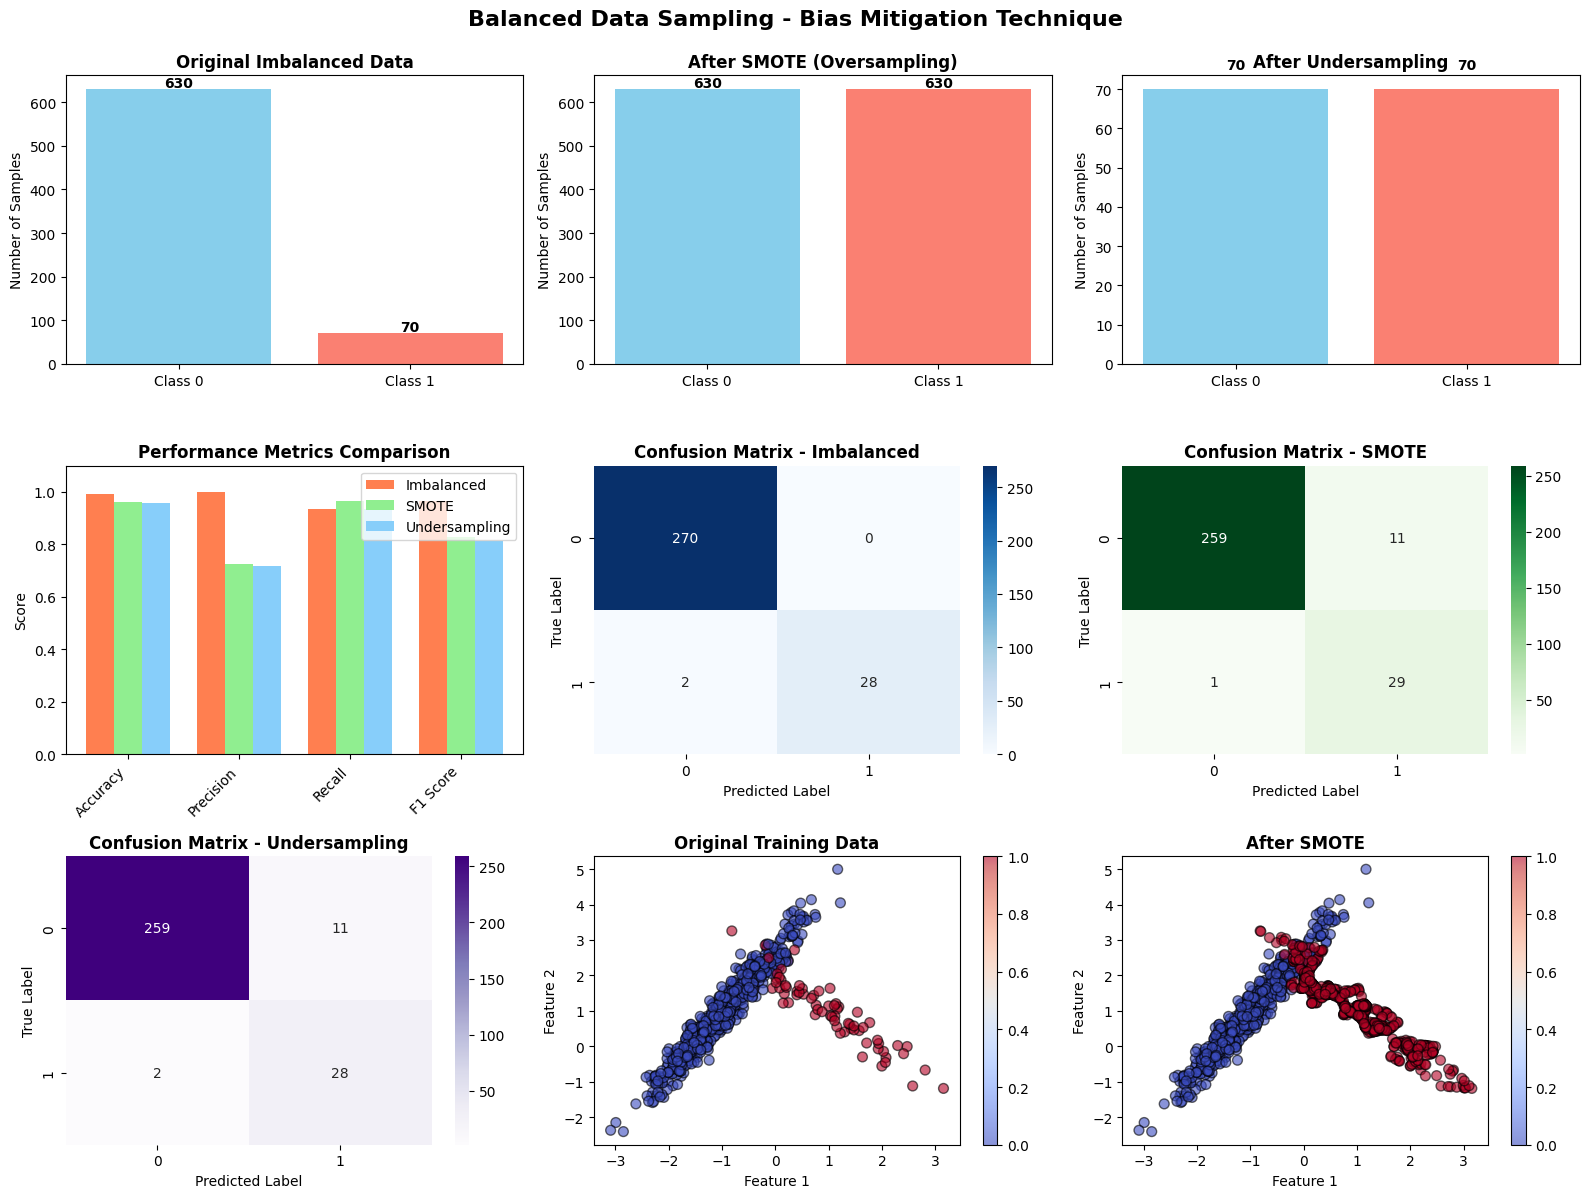


SUMMARY: Performance Comparison

               Method  Accuracy  Precision   Recall  F1 Score
     Imbalanced Data  0.993333   1.000000 0.933333  0.965517
               SMOTE  0.960000   0.725000 0.966667  0.828571
Random Undersampling  0.956667   0.717949 0.933333  0.811594

Key Observations:
✓ SMOTE increases minority class samples by generating synthetic examples
✓ Random Undersampling reduces majority class samples
✓ Both techniques balance the dataset and improve model fairness
✓ Recall typically improves significantly for minority class
✓ F1 Score provides balanced measure of precision and recall
